## Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably"

#### Factors that can be controlled to manage overfitting:
- Training data size
- Model complexity (# parameters)
- Regularization


#### Model complexity and over-fitting


From: https://github.com/fchollet/deep-learning-with-python-notebooks

In [0]:
!pip install q keras==2.3.1

In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


In [0]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

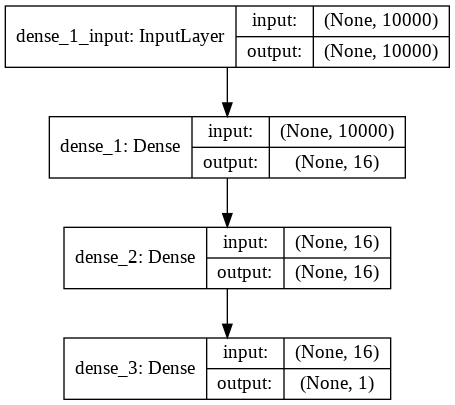

In [0]:
from keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(original_model, show_shapes=True, show_layer_names=True)

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

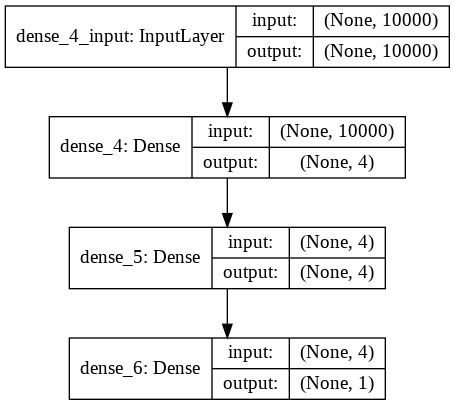

In [0]:
from keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(smaller_model, show_shapes=True, show_layer_names=True)

In [0]:
NUM_EPOCH =20

In [0]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=NUM_EPOCH,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.4653 - acc: 0.8229 - val_loss: 0.3497 - val_acc: 0.8751
Epoch 2/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.2665 - acc: 0.9075 - val_loss: 0.3157 - val_acc: 0.8713
Epoch 3/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.2036 - acc: 0.9280 - val_loss: 0.2822 - val_acc: 0.8854
Epoch 4/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.1714 - acc: 0.9384 - val_loss: 0.2949 - val_acc: 0.8830
Epoch 5/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.1489 - acc: 0.9481 - val_loss: 0.3117 - val_acc: 0.8783
Epoch 6/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.1298 - acc: 0.9546 - val_loss: 0.3332 - val_acc: 0.8745
Epoch 7/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1135 - acc: 0.9620 - val_loss: 0.3507 - 

In [0]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=NUM_EPOCH,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.5728 - acc: 0.7109 - val_loss: 0.5131 - val_acc: 0.7943
Epoch 2/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.4641 - acc: 0.8641 - val_loss: 0.4750 - val_acc: 0.8552
Epoch 3/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.4162 - acc: 0.9078 - val_loss: 0.4550 - val_acc: 0.8750
Epoch 4/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.3818 - acc: 0.9268 - val_loss: 0.4457 - val_acc: 0.8713
Epoch 5/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.3510 - acc: 0.9410 - val_loss: 0.4413 - val_acc: 0.8707
Epoch 6/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.3235 - acc: 0.9510 - val_loss: 0.4404 - val_acc: 0.8706
Epoch 7/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.2984 - acc: 0.9592 - val_loss: 0.4381 - 

In [0]:
epochs = range(1, NUM_EPOCH+1)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [0]:
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

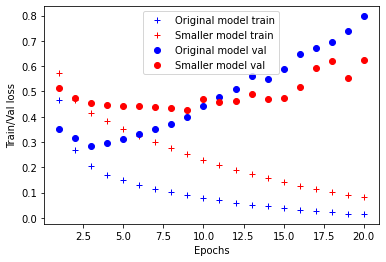

In [0]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_train_loss, 'b+', label='Original model train')
plt.plot(epochs, smaller_model_train_loss, 'r+', label='Smaller model train')
plt.plot(epochs, original_val_loss, 'bo', label='Original model val')
plt.plot(epochs, smaller_model_val_loss, 'ro', label='Smaller model val')
plt.xlabel('Epochs')
plt.ylabel('Train/Val loss')
plt.legend()

plt.show()

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [0]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=NUM_EPOCH,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 17s 668us/step - loss: 0.4527 - acc: 0.8058 - val_loss: 0.3498 - val_acc: 0.8516
Epoch 2/20
25000/25000 [==============================] - 17s 669us/step - loss: 0.2206 - acc: 0.9131 - val_loss: 0.2933 - val_acc: 0.8842
Epoch 3/20
25000/25000 [==============================] - 17s 673us/step - loss: 0.1308 - acc: 0.9512 - val_loss: 0.4684 - val_acc: 0.8255
Epoch 4/20
25000/25000 [==============================] - 17s 674us/step - loss: 0.0780 - acc: 0.9754 - val_loss: 0.3908 - val_acc: 0.8588
Epoch 5/20
25000/25000 [==============================] - 17s 670us/step - loss: 0.0622 - acc: 0.9878 - val_loss: 0.4000 - val_acc: 0.8807
Epoch 6/20
25000/25000 [==============================] - 17s 670us/step - loss: 0.0036 - acc: 0.9996 - val_loss: 0.6983 - val_acc: 0.8701
Epoch 7/20
25000/25000 [==============================] - 17s 669us/step - loss: 0.1047 - acc: 0.9888 - val_loss: 0.

In [0]:
epochs = range(1, NUM_EPOCH+1)
original_val_loss = original_hist.history['val_loss']
bigger_model_val_loss = bigger_model_hist.history['val_loss']

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']


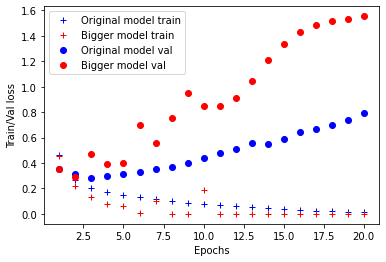

In [0]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_train_loss, 'b+', label='Original model train')
plt.plot(epochs, bigger_model_train_loss, 'r+', label='Bigger model train')
plt.plot(epochs, original_val_loss, 'bo', label='Original model val')
plt.plot(epochs, bigger_model_val_loss, 'ro', label='Bigger model val')
plt.xlabel('Epochs')
plt.ylabel('Train/Val loss')
plt.legend()

plt.show()

## Regularization


In [0]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=NUM_EPOCH,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.5057 - acc: 0.8233 - val_loss: 0.3892 - val_acc: 0.8784
Epoch 2/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.3246 - acc: 0.9009 - val_loss: 0.3373 - val_acc: 0.8890
Epoch 3/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.2780 - acc: 0.9172 - val_loss: 0.3297 - val_acc: 0.8883
Epoch 4/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2570 - acc: 0.9253 - val_loss: 0.3464 - val_acc: 0.8815
Epoch 5/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2426 - acc: 0.9312 - val_loss: 0.3413 - val_acc: 0.8838
Epoch 6/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2336 - acc: 0.9340 - val_loss: 0.3473 - val_acc: 0.8832
Epoch 7/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2312 - acc: 0.9364 - val_loss: 0.3927 - 

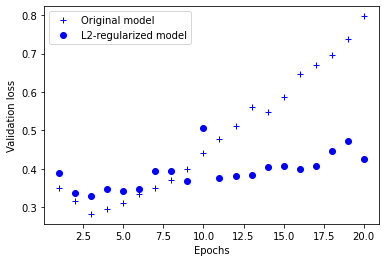

In [0]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [0]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=NUM_EPOCH,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.5981 - acc: 0.6720 - val_loss: 0.4537 - val_acc: 0.8668
Epoch 2/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.4495 - acc: 0.8076 - val_loss: 0.3444 - val_acc: 0.8844
Epoch 3/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.3591 - acc: 0.8598 - val_loss: 0.2892 - val_acc: 0.8893
Epoch 4/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.3025 - acc: 0.8889 - val_loss: 0.2773 - val_acc: 0.8889
Epoch 5/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2644 - acc: 0.9062 - val_loss: 0.2789 - val_acc: 0.8896
Epoch 6/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2330 - acc: 0.9192 - val_loss: 0.2887 - val_acc: 0.8883
Epoch 7/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2087 - acc: 0.9270 - val_loss: 0.2994 - 

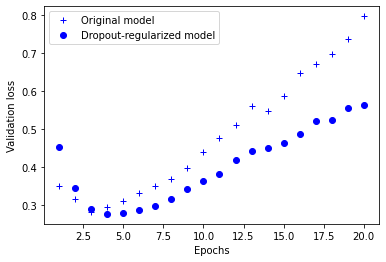

In [0]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()